# “Why are there so many programming languages?”


The underlying fact is that programming languages serve the same purpose: to turn human thoughts into the 1’s and 0’s that the computer understands. so at their most foundational level, these languages are all the same. But on the surface – where humans interact with them – they vary a lot. This is document looks at some of the reasons as to why?

In [2]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

urllib2 is a Python module for fetching URLs (Uniform Resource Locators). It offers a very simple interface, in the form of the urlopen function. This is capable of fetching URLs using a variety of different protocols. It also offers a slightly more complex interface for handling common situations - like basic authentication, cookies, proxies and so on. These are provided by objects called handlers and openers
url = "https://docs.python.org/2/howto/urllib2.html"


In python 3 urllib2 was merged into urllib.
solution url = "http://stackoverflow.com/questions/6594620/python-3-2-unable-to-import-urllib2-importerror-no-module-named-urllib2"
import urllib.request

wp = urllib.request.urlopen("http://goggle.com")

pw = wp.read()

print(pw)

In [3]:
# getting table from wikipedia
# https://adesquared.wordpress.com/2013/06/16/using-python-beautifulsoup-to-scrape-a-wikipedia-table/
from bs4 import BeautifulSoup
import urllib.request
wiki = "https://en.wikipedia.org/wiki/Comparison_of_programming_languages"
page = urllib.request.urlopen(wiki)
soup = BeautifulSoup(page)
print (soup)



<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Comparison of programming languages - Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Comparison_of_programming_languages","wgTitle":"Comparison of programming languages","wgCurRevisionId":715944475,"wgRevisionId":715944475,"wgArticleId":3406469,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with unsourced statements","Articles with unsourced statements from February 2011","All articles with dead external links","Articles with dead external links from February 2016","Articles with DMOZ links","Programming languag

C:\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


If you look at the code behind the Wikipedia article, you’ll see that there are multiple tables but only one (thankfully the one we want) uses the “wikitable sortable” class – this is great as we can use BeautifulSoup to find  the table with the “wikitable sortable” class and know that we will only get this table.

In [4]:
from bs4 import BeautifulSoup
import urllib.request
wiki = "https://en.wikipedia.org/wiki/Comparison_of_programming_languages"
page = urllib.request.urlopen(wiki)
soup = BeautifulSoup(page,'html.parser')
 
language = ""
intendedUse = ""
imperative = ""
objectOriented = ""
functional =""
procedural = ""
generic = ""
reflective =""
eventDriven = ""
otherParadigm = ""
table = soup.find("table", { "class" : "wikitable sortable" })
#print (table)


– the first stage is to iterate through each row (tr element) and then assign each element in the tr to a variable. At this stage, we will grab everything column and store it in a list for further iteration later.The .findAll function in Python returns a list and so on line 20, we obtain a list containing four elements, one for each of the columns in the table. This means they can be accessed via the cells[n].find(text=True) syntax. 

I tried to use the following code.
from bs4 import BeautifulSoup
import urllib
 
wiki = "http://en.wikipedia.org/wiki/List_of_postcode_districts_in_the_United_Kingdom"
#header = {'User-Agent': 'Mozilla/5.0'} #Needed to prevent 403 error on Wikipedia
#req = urllib.Request(wiki,headers=header)
page = urllib.request.urlopen(wiki)
soup = BeautifulSoup(page)
 
area = ""
district = ""
town = ""
county = ""
 
table = soup.find("table", { "class" : "wikitable sortable" })
 
f = open('output.csv', 'w')
 
for row in table.findAll("tr"):
    cells = row.findAll("td")
    #For each "tr", assign each "td" to a variable.
    if len(cells) == 4:
        area = cells[0].find(text=True)
        district = cells[1].findAll(text=True)
        town = cells[2].find(text=True)
        county = cells[3].find(text=True)
 
    #district can be a list of lists, so we want to iterate through the top level lists first...
    for x in range(len(district)):
        #For each list, split the string
        postcode_list = district[x].split(",")
        #For each item in the split list...
        for i in range(len(postcode_list)):
            #Check it's a postcode and not other text
            if (len(postcode_list[i]) > 2) and (len(postcode_list[i]) <= 5):
                #Strip out the "\n" that seems to be at the start of some postcodes
                write_to_file = area + "," + postcode_list[i].lstrip('\n').strip() + "," + town + "," + county + "\n"
                print (write_to_file)
                f.write(write_to_file)
 
f.close()

It did not work for me. But it seems to be a good appraoch. I have to come back again.



In [5]:
import webbrowser
website = 'https://en.wikipedia.org/wiki/Comparison_of_programming_languages'
webbrowser.open(website)

# I found a good website to get all wikipedia tables parsed
url = "http://wikitables.geeksta.net/"
webbrowser.open(url)

True

In [6]:
#Copy the data in a text editor and read data

intendedUse = pd.read_csv("intendedUse.csv")

In [7]:
intendedUse.head()

,Language,Intended use,Imperative,Object-oriented,Functional,Procedural,Generic,Reflective,Event-driven,Other paradigm(s),Standardized?
0,ActionScript 3.0,"Application, client-side, web",Yes,Yes,NaN,NaN,NaN,NaN,Yes,NaN,"1996, ECMA"
1,Ada,"Application, embedded, realtime, system",Yes,Yes,NaN,Yes,Yes,NaN,NaN,"concurrent,[5] distributed,","1983, 2005, 2012, ANSI, ISO, GOST 27831-88"
2,Aldor,"Highly domain-specific, symbolic computing",Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,No
3,ALGOL 58,Application,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,ALGOL 60,Application,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1960, IFIP WG 2.1, ISO"


In [8]:
intendedUse.columns

Index(['Language', 'Intended use', 'Imperative', 'Object-oriented',
       'Functional', 'Procedural', 'Generic', 'Reflective', 'Event-driven',
       'Other paradigm(s)', 'Standardized?'],
      dtype='object')

In [9]:
# selecting columns
# http://stackoverflow.com/questions/11285613/selecting-columns
intendedUse_new = intendedUse[intendedUse.columns[0:2]] # Remember, Python is 0-based! The "3nd" entry is at slot 2.

In [10]:
intendedUse_new.head()

,Language,Intended use
0,ActionScript 3.0,"Application, client-side, web"
1,Ada,"Application, embedded, realtime, system"
2,Aldor,"Highly domain-specific, symbolic computing"
3,ALGOL 58,Application
4,ALGOL 60,Application


In [11]:
# another way to make a dataframe with only selecting the columns needed
#saved_column = df.column_name #you can also use df['column_name']
intendedUse1 = intendedUse[['Language','Intended use']]

In [12]:
intendedUse1.head()

,Language,Intended use
0,ActionScript 3.0,"Application, client-side, web"
1,Ada,"Application, embedded, realtime, system"
2,Aldor,"Highly domain-specific, symbolic computing"
3,ALGOL 58,Application
4,ALGOL 60,Application


In [13]:
intendedUse1.tail()

,Language,Intended use
123,Windows PowerShell,Administration
124,Wolfram Language,Symbolic language
125,XL,NaN
126,Xojo,"Application, RAD, general, web"
127,XPath/XQuery,"Databases, data processing, scripting"


In [14]:
#renaming the columns
intendedUse1.columns = ['Language','IntendedUse']

In [15]:
intendedUse1.tail()

,Language,IntendedUse
123,Windows PowerShell,Administration
124,Wolfram Language,Symbolic language
125,XL,NaN
126,Xojo,"Application, RAD, general, web"
127,XPath/XQuery,"Databases, data processing, scripting"


In [16]:
# splitting the commas in the intendedUse. make sure the columns have proper name
#http://stackoverflow.com/questions/31334371/pandas-split-separated-values-in-a-dataframe-column-one-series-into-multiple
def func(group):
    return pd.Series(group.IntendedUse.str.split(',').values[0], name='IntendedUse')
ser = intendedUse1.groupby(level=0).apply(func)


The output DataFrame index depends on the requested dtypes:

For numeric dtypes, it will include: count, mean, std, min, max, and lower, 50, and upper percentiles.

For object dtypes (e.g. timestamps or strings), the index will include the count, unique, most common, and frequency of the most common. Timestamps also include the first and last items.

For mixed dtypes, the index will be the union of the corresponding output types. Non-applicable entries will be filled with NaN. Note that mixed-dtype outputs can only be returned from mixed-dtype inputs and appropriate use of the include/exclude arguments.

If multiple values have the highest count, then the count and most common pair will be arbitrarily chosen from among those with the highest count.

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

In [17]:
#series of intended use
ser

0    0                Application
     1                client-side
     2                        web
1    0                Application
     1                   embedded
     2                   realtime
     3                     system
2    0     Highly domain-specific
     1         symbolic computing
3    0                Application
4    0                Application
5    0                Application
6    0       Parallel application
7    0                Application
     1            data processing
8    0                    General
9    0    GUI automation (macros)
     1     highly domain-specific
10   0    GUI automation (macros)
     1     highly domain-specific
11   0                      Shell
     1                  scripting
12   0                Application
     1                  education
13   0                Application
     1                   business
     2                        web
14   0                Application
     1                  scripting
15   0        

In [18]:
#get the Language dataFrame
language = intendedUse1.Language

In [19]:
language.head()

0    ActionScript 3.0
1                 Ada
2               Aldor
3            ALGOL 58
4            ALGOL 60
Name: Language, dtype: object

In [20]:
#converting series to dataframe
ser = Series.to_frame(ser)


In [21]:
ser.head()


IntendedUse
0 0   Application
  1   client-side
  2           web
1 0   Application
  1      embedded

In [22]:
#converting language to dataframe
language = Series.to_frame(language)

In [23]:
language.head()

,Language
0,ActionScript 3.0
1,Ada
2,Aldor
3,ALGOL 58
4,ALGOL 60


Perhaps you are data munging in Python, using “pandas”, and you attempt to use DataFrame.merge() in order to put two DataFrames together.

“cannot join with no level specified and no overlapping names”

This happens when you have two DataFrames with one having a MultiIndex type, which *could* play nice together (e.g. you have “year, month” on the left, and “year” on the right, *but do not have names set.*

You’ll need to explicitly set names with

leftdf.index.levels[0].name = “onename”
leftdf.index.levels[1].name = “twoname”
rightdf.index.levels[0].name = “onename”

Alternatively, you can make it work if you reindex the right-hand side by the left hand side:

rightdf2 = rightdf.reindex(index=leftdf.index, level=0) ## NOTE Assignment, does not modify rightdf in-place

In [24]:
language = language.reindex(index=ser.index, level=0)

In [25]:
languagesUse = language.join(ser,how ='outer')

In [26]:
languagesUse

Language              IntendedUse
0   0    ActionScript 3.0              Application
    1    ActionScript 3.0              client-side
    2    ActionScript 3.0                      web
1   0                 Ada              Application
    1                 Ada                 embedded
    2                 Ada                 realtime
    3                 Ada                   system
2   0               Aldor   Highly domain-specific
    1               Aldor       symbolic computing
3   0            ALGOL 58              Application
4   0            ALGOL 60              Application
5   0            ALGOL 68              Application
6   0            Ateji PX     Parallel application
7   0                 APL              Application
    1                 APL          data processing
8   0   Assembly language                  General
9   0          AutoHotkey  GUI automation (macros)
    1          AutoHotkey   highly domain-specific
10  0              AutoIt  GUI automation (macros)
    1              AutoIt   highly domain-specific
11  0                Bash                    Shell
    1                Bash                scripting
12  0               BASIC              Application
    1               BASIC                education
13  0                 BBj              Application
    1                 BBj                 business
    2                 BBj                      web
14  0           BeanShell              Application
    1           BeanShell                scripting
15  0                BitC                   System
...                   ...                      ...
117 0               Swift              Application
    1               Swift                  general
118 0                 Tcl              Application
    1                 Tcl                scripting
    2                 Tcl                      web
119 0        Visual Basic              Application
    1        Visual Basic                      RAD
    2        Visual Basic                education
    3        Visual Basic                 business
    4        Visual Basic                  general
    5        Visual Basic           (Includes VBA)
    6        Visual Basic        office automation
120 0   Visual Basic .NET              Application
    1   Visual Basic .NET                      RAD
    2   Visual Basic .NET                education
    3   Visual Basic .NET                      web
    4   Visual Basic .NET                 business
    5   Visual Basic .NET                  general
121 0       Visual FoxPro              Application
122 0       Visual Prolog              Application
123 0  Windows PowerShell           Administration
124 0    Wolfram Language        Symbolic language
125 0                  XL                      NaN
126 0                Xojo              Application
    1                Xojo                      RAD
    2                Xojo                  general
    3                Xojo                      web
127 0        XPath/XQuery                Databases
    1        XPath/XQuery          data processing
    2        XPath/XQuery                scripting

[287 rows x 2 columns]

In [27]:
languagesUse.describe()

,Language,IntendedUse
count,287,284
unique,128,64
top,C#,Application
freq,7,82


In [30]:
#Print dataframe as a table
from IPython.display import display, HTML

# Assuming that dataframes df1 and df2 are already defined:
# print ('Use of Languages: ')
 # display(languagesUse)
    
print ("Intended Use of Languages:")
HTML(languagesUse.to_html())

Intended Use of Languages:


In [29]:
intendedUse.describe()

,Language,Intended use,Imperative,Object-oriented,Functional,Procedural,Generic,Reflective,Event-driven,Other paradigm(s),Standardized?
count,128,125,95,82,60,54,36,34,26,64,127
unique,128,76,1,1,2,1,1,2,2,41,33
top,S,Application,Yes,Yes,Yes,Yes,Yes,Yes,Yes,concurrent,No
freq,1,19,95,82,59,54,36,33,25,7,88


In [205]:
#Concise summary of a DataFrame.
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
intendedUse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
Language             128 non-null object
Intended use         125 non-null object
Imperative           95 non-null object
Object-oriented      82 non-null object
Functional           60 non-null object
Procedural           54 non-null object
Generic              36 non-null object
Reflective           34 non-null object
Event-driven         26 non-null object
Other paradigm(s)    64 non-null object
Standardized?        127 non-null object
dtypes: object(11)
memory usage: 11.1+ KB


In [319]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline

In [320]:
plt.figure();

In [321]:
intendedUse.ix[1]

Language                                                 Ada
Intended use         Application, embedded, realtime, system
Imperative                                               Yes
Object-oriented                                          Yes
Functional                                               NaN
Generic                                                  Yes
Reflective                                               NaN
Event-driven                                             NaN
Other paradigm(s)                concurrent,[5] distributed,
Name: 1, dtype: object

In [322]:
# Deleting a row based on the column values
#Doesn't do anything:

#df = df[df.line_race != None]
#Does work:

#df = df[df.line_race.notnull()]
intendedUse = intendedUse[intendedUse.Functional != 'can be viewed as']

In [323]:
intendedUse.describe()

,Language,Intended use,Imperative,Object-oriented,Functional,Generic,Reflective,Event-driven,Other paradigm(s)
count,127,124,94,82,59,36,34,26,63
unique,127,76,1,1,1,1,2,2,41
top,Gambas,Application,Yes,Yes,Yes,Yes,Yes,Yes,concurrent
freq,1,19,94,82,59,36,33,25,7


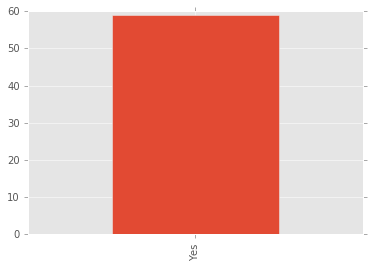

In [324]:
intendedUse.Functional.value_counts().plot(kind='bar')

In [325]:
#set-value-for-particular-cell
#http://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe/24517695#24517695
#Be careful using set_values. It makes the rest of the columns as NaN
# intendedUse.ix['Forth ','Imperative']='Yes' adds another row 

In [326]:
intendedUse.tail()
# to delete the last row
#intendedUse = intendedUse.ix[:-1]

,Language,Intended use,Imperative,Object-oriented,Functional,Generic,Reflective,Event-driven,Other paradigm(s)
123,Windows PowerShell,Administration,Yes,Yes,Yes,NaN,Yes,NaN,pipeline
124,Wolfram Language,Symbolic language,Yes,Yes,Yes,NaN,NaN,NaN,"logic, distributed"
125,XL,NaN,Yes,Yes,NaN,NaN,NaN,NaN,concept programming
126,Xojo,"Application, RAD, general, web",Yes,Yes,NaN,NaN,Yes,Yes,NaN
127,XPath/XQuery,"Databases, data processing, scripting",NaN,NaN,Yes,NaN,NaN,NaN,tree-oriented


In [327]:
# to select the last row
intendedUse.iloc[128:]

,Language,Intended use,Imperative,Object-oriented,Functional,Generic,Reflective,Event-driven,Other paradigm(s)


In [328]:
# drop the last row intendedUse.drop(128)

In [329]:
intendedUse.tail()

,Language,Intended use,Imperative,Object-oriented,Functional,Generic,Reflective,Event-driven,Other paradigm(s)
123,Windows PowerShell,Administration,Yes,Yes,Yes,NaN,Yes,NaN,pipeline
124,Wolfram Language,Symbolic language,Yes,Yes,Yes,NaN,NaN,NaN,"logic, distributed"
125,XL,NaN,Yes,Yes,NaN,NaN,NaN,NaN,concept programming
126,Xojo,"Application, RAD, general, web",Yes,Yes,NaN,NaN,Yes,Yes,NaN
127,XPath/XQuery,"Databases, data processing, scripting",NaN,NaN,Yes,NaN,NaN,NaN,tree-oriented


In [330]:
#the pivot table is smart enough to start aggregating the data and summarizing it by grouping
#http://pbpython.com/pandas-pivot-table-explained.html
pivot = pd.pivot_table(intendedUse, index='Language', aggfunc='count')

In [331]:
pivot

,Event-driven,Functional,Generic,Imperative,Intended use,Object-oriented,Other paradigm(s),Reflective
Language,,,,,,,,
ALGOL 58,0,0,0,1,1,0,0,0
ALGOL 60,0,0,0,1,1,0,0,0
ALGOL 68,0,0,0,1,1,0,1,0
APL,0,0,0,0,1,0,1,0
ActionScript 3.0,1,0,0,1,1,1,0,0
Ada,0,0,1,1,1,1,1,0
Aldor,0,1,0,1,1,1,0,0
Assembly language,0,0,0,1,1,0,1,0
Ateji PX,0,0,0,0,1,1,1,0


In [338]:
# drop you do not need to assign it to anything
# dropped intended use and standardised
pivot.drop(pivot.columns[[4]], axis=1, inplace=True)

In [ ]:
# dropped other Paradigms

In [339]:
pivot.head()


,Event-driven,Functional,Generic,Imperative,Object-oriented,Other paradigm(s),Reflective
Language,,,,,,,
ALGOL 58,0,0,0,1,0,0,0
ALGOL 60,0,0,0,1,0,0,0
ALGOL 68,0,0,0,1,0,1,0
APL,0,0,0,0,0,1,0
ActionScript 3.0,1,0,0,1,1,0,0


In [340]:
sumPivot = np.sum(pivot)

In [341]:
sumPivot

Event-driven         26
Functional           59
Generic              36
Imperative           94
Object-oriented      82
Other paradigm(s)    63
Reflective           34
dtype: int64

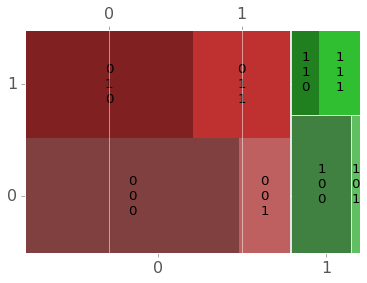

In [342]:
# a mosiac graph
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(pivot, ['Event-driven', 'Functional','Generic']);

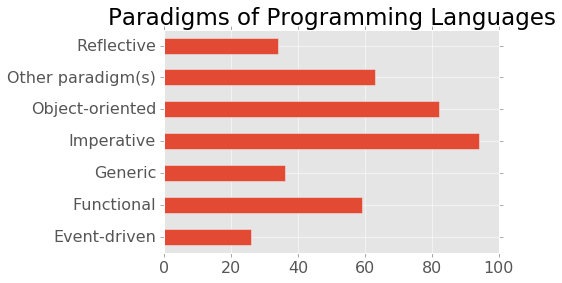

In [344]:
sumPivot.plot(kind = 'barh', title = 'Paradigms of Programming Languages')